<a href="https://colab.research.google.com/github/Farida-EL-Shenawy/MasteryHub_ITS_Task/blob/main/Telco_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

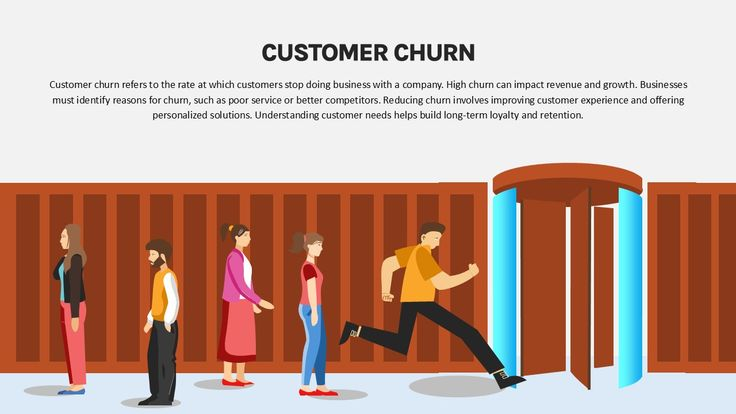

# **About Dataset (From Kaggle)**
# **Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

# **Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

# **The data set includes information about:**

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

# **Import Libraries**

In [39]:
#Basic libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing & Feature Engineering
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  # Added for better boosting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
#Model Saving
import joblib

# Warnings
import warnings
warnings.filterwarnings('ignore')

# **A) Downloading Dataset from Kaggle to Colab**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faridakhaledaly","key":"0ff9c567c66f6538c82d86465cf0b231"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

In [6]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


# **Load Data and Understand Structure**

We start by loading the dataset and inspecting its shape, data types, sample rows, and basic stats to understand its structure.

In [7]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **How many rows and colmns in our dataset?**

In [9]:
print("Shape:", df.shape)

Shape: (7043, 21)


# **We need to know the Info about datatypes and missing values**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Lets Count the value of each class**

In [11]:
import plotly.express as px

# Count the values
counts = df['Churn'].value_counts().reset_index()
counts.columns = ['Churn', 'Count']

# Map your custom colors
color_map = {1: 'blue', 0: 'pink'}  # Assuming true=1, false=0 in label encoding

# Plot
fig = px.bar(
    counts,
    x='Churn',
    y='Count',
    color='Churn',
    color_discrete_map=color_map,
    text='Count',
    title='Distribution of Churn'
)

fig.update_layout(
    xaxis_title='Churn',
    yaxis_title='Count',
    plot_bgcolor='white'
)

fig.show()

# **B) Lets start our Data Preprocessing step by Step**

# **1) Drop uneeded columns**

### Drop 'customerID' as it is a unique identifier with no predictive value for churn classification.


In [12]:
df = df.drop(columns=['customerID'])

# **2) Are there Any Missing Values ?**

We want to see where missing values exist to plan our imputation.

In [13]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


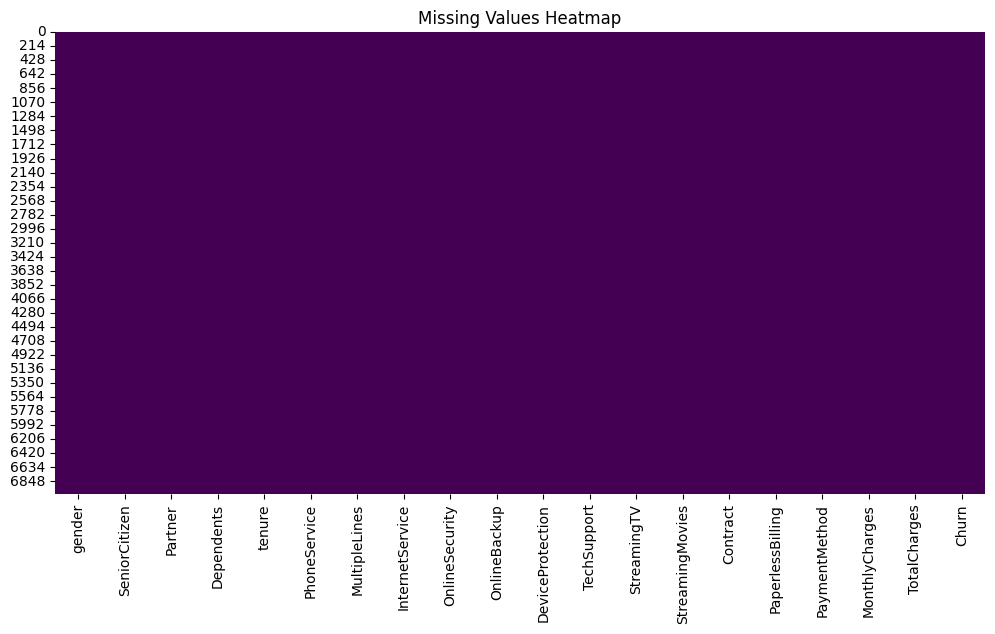

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

 there is no missing data.

### **But we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!**

Converts the TotalCharges column to numeric.

Any value that cannot be converted (like empty string '' or non-numeric text) is replaced with NaN if errors='coerce'.

coerce is what forces invalid parses to become NaN.

In [15]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


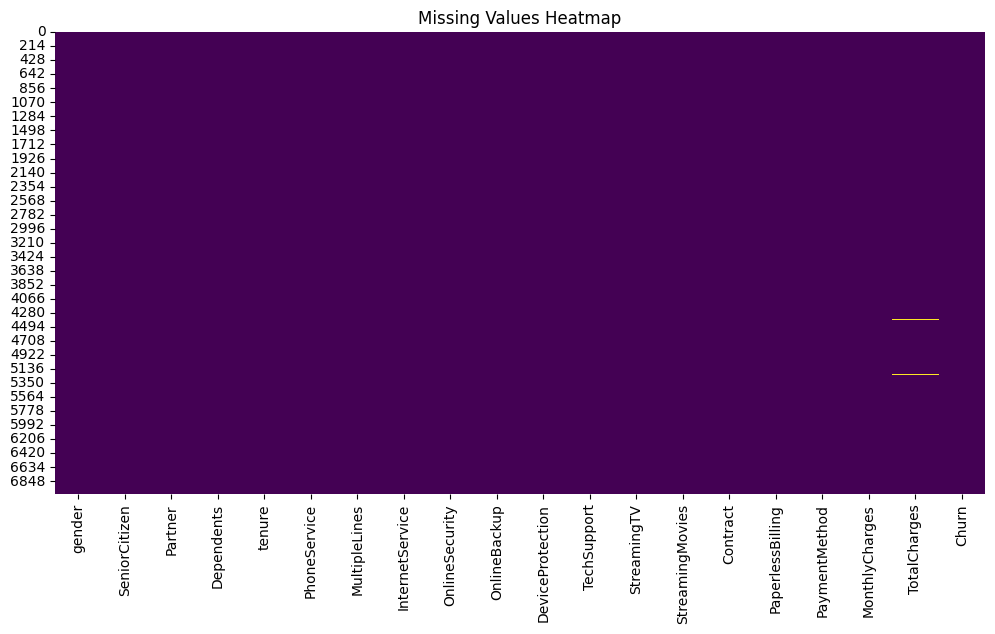

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### YESS! We found these 11 missing values.

In [17]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# **KNN imputer for missing values handling**

### **We include 'tenure' and 'MonthlyCharges' as predictors in KNNImputer for 'TotalCharges'**
In Telco Customer Churn prediction, KNNImputer is preferred over mean imputation because it preserves the natural relationships between tenure, MonthlyCharges, and TotalCharges by imputing missing values based on similar customers. This leads to more realistic and predictive imputations that improve model performance.


In [18]:
# Impute tenure, MonthlyCharges, TotalCharges
imputer = KNNImputer(n_neighbors=5)
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = imputer.fit_transform(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

### KNNImputer finds the 5 most similar customers (based on available data) and uses their values to fill in what’s missing—just like KNN classification finds the closest points to decide a label.

In [19]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


After KNN imputation, tenure column may contain floats (e.g., 12.0, 0.0).

But logically tenure represents months (should be integer), Convert 'tenure' back to integer months after imputation to maintain data consistency.

In [20]:
df['tenure'] = df['tenure'].round().astype(int)

In [21]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.802072
std,0.368612,24.559481,30.090047,2266.727171
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# **3) Are there any Outliers ?**

Using IQR (Interquartile Range):

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 - Q1

Outliers = values outside [Q1 - 1.5×IQR, Q3 + 1.5×IQR]

We detect and treat outliers only in continuous numerical features ('tenure', 'MonthlyCharges', 'TotalCharges')
because outlier detection based on IQR applies to numeric distributions.
Categorical features don't have outliers in the same statistical sense.


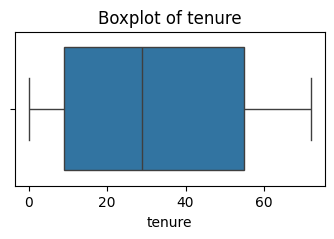

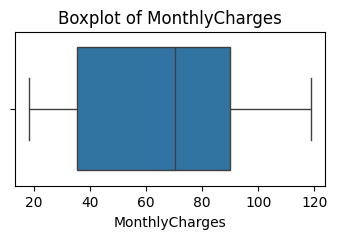

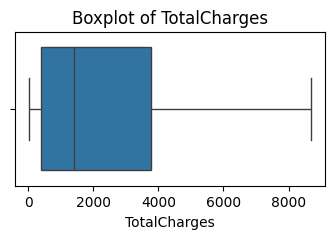

In [22]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#  **Function to detect outliers in numeric columns**

In [23]:
def find_outlier_indices(df, cols):
    outlier_indices = set()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

outlier_rows = find_outlier_indices(df, numeric_cols)
print(f'Number of rows with outliers: {len(outlier_rows)}')

Number of rows with outliers: 0


# **4) Encoding Categorical Variables**

ML models need numbers → we’ll use Label Encoding and One-hot encoding for simplicity.


In [24]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

# Label encoding for binary
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encoding for multi-category
df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in binary_cols], drop_first=True)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [26]:
print(df.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

# **5) Feature Correlation with Target**

Correlation helps select relevant features.

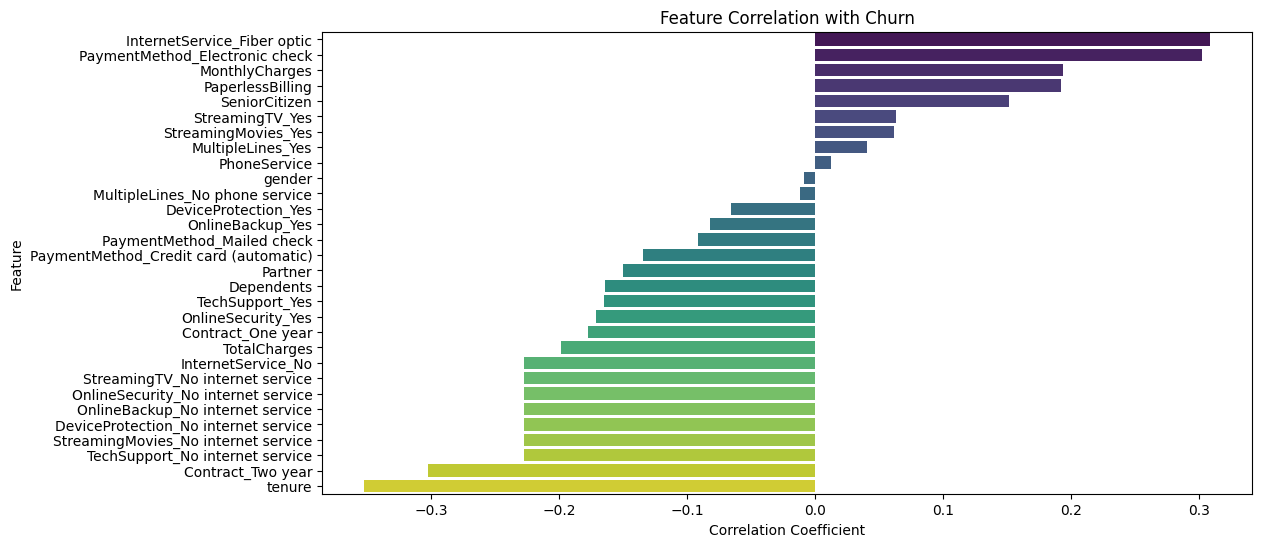

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation with target
corr = df.corr()['Churn'].sort_values(ascending=False)

# Drop target itself to avoid correlation=1 at top
corr = corr.drop('Churn')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=corr.values, y=corr.index, palette='viridis')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

# **Positive correlation (right side):**

As the feature increases, Churn is more likely (Churn=1).

Example: MonthlyCharges has ~+0.2
→ Customers with higher monthly bills tend to churn more.

# **Negative correlation (left side):**

As the feature increases, Churn is less likely (Churn=0).

Example: Contract has ~-0.4
→ Customers with longer contracts churn less.

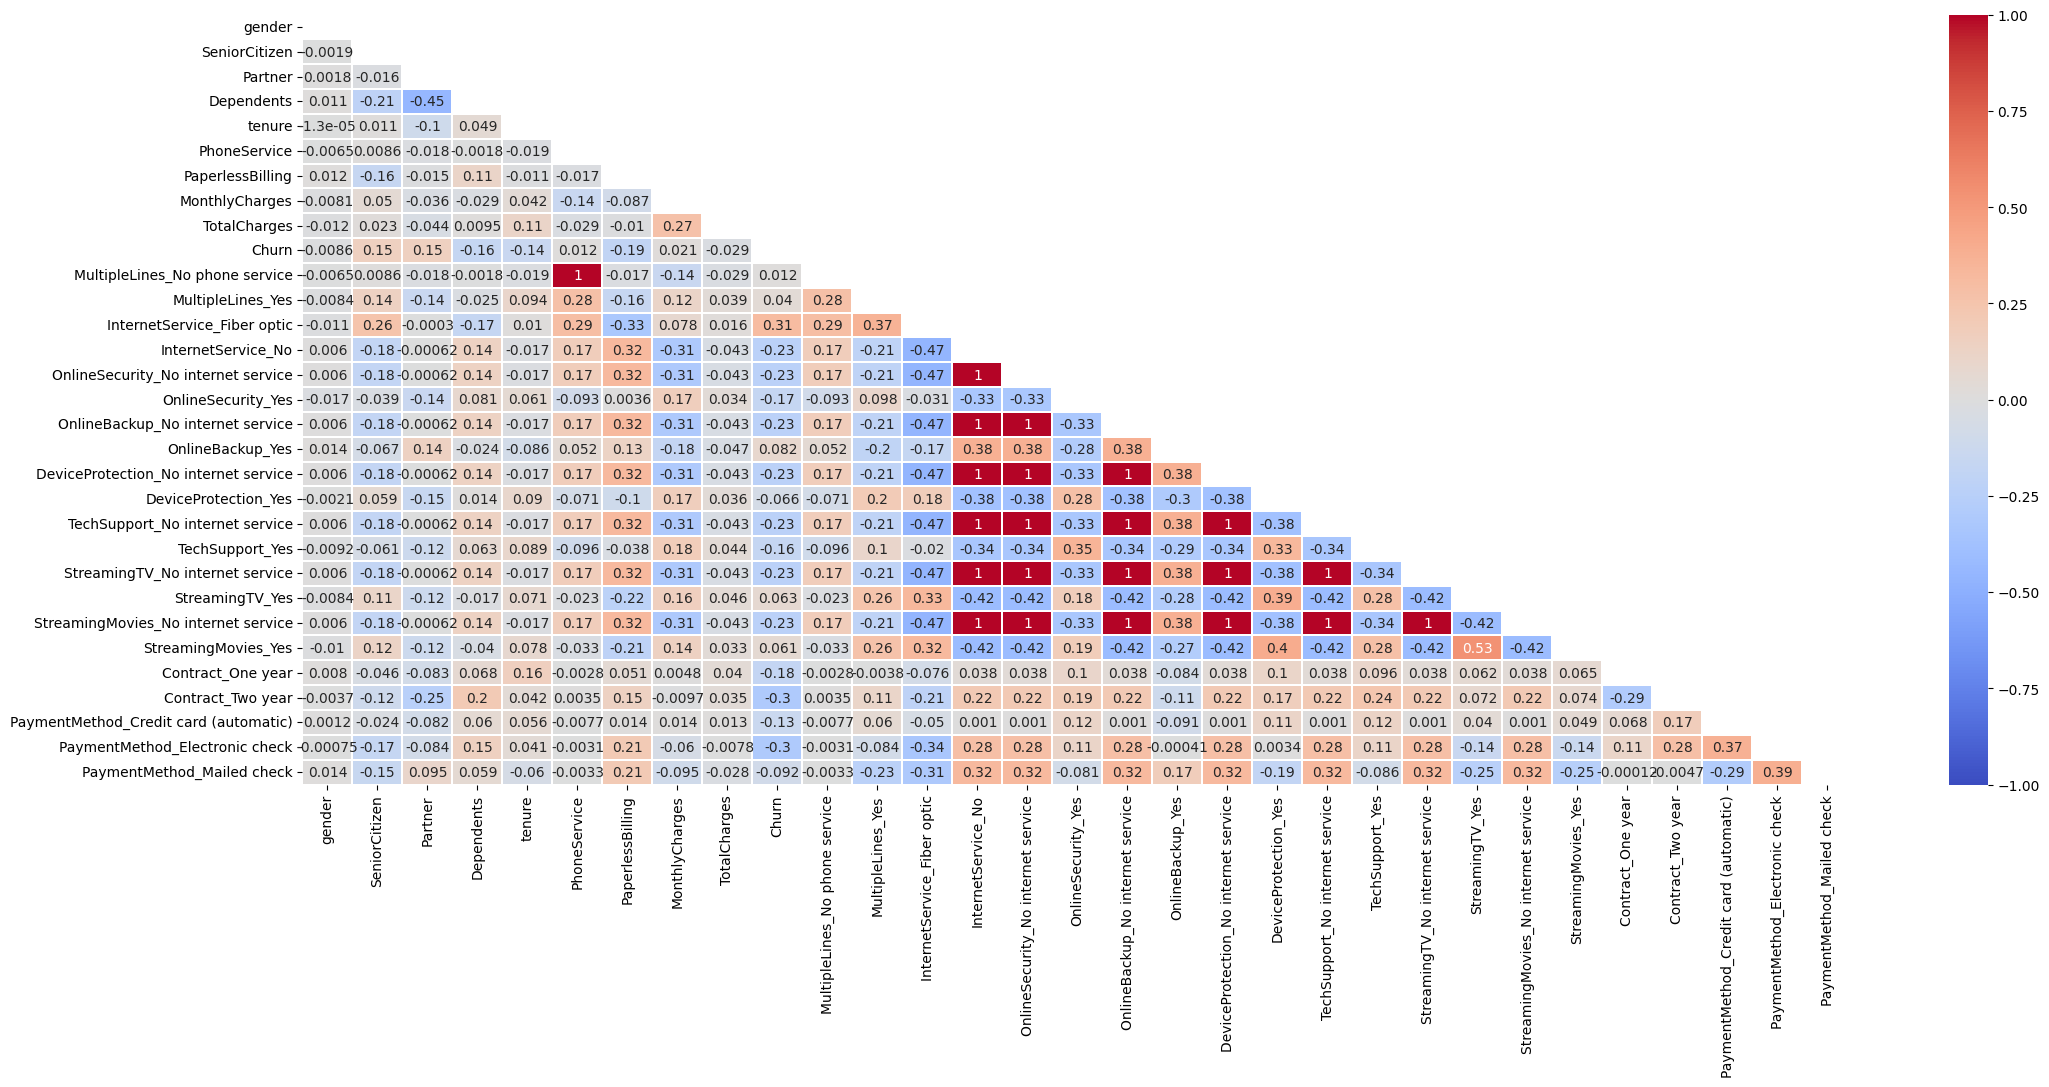

In [28]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## **Use correlation plots for exploration, not for hard selection.**
Don’t remove features just because their correlation with churn is near 0. Include them all in the model and let the model discover nonlinear interactions and combinations.

# **6) Splitting the data**

### **Train-Test Split**

In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **7) Scaling Numerical Features**

## Distribution of numerical cols before scaling

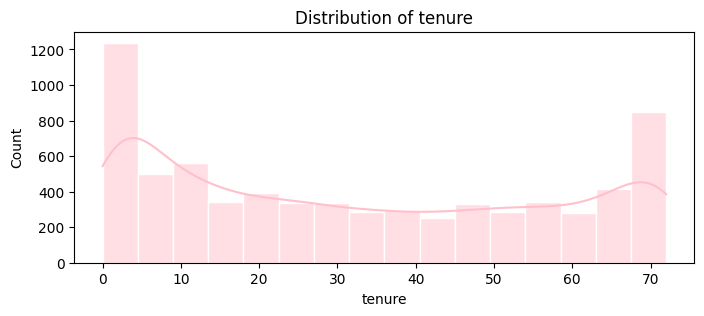

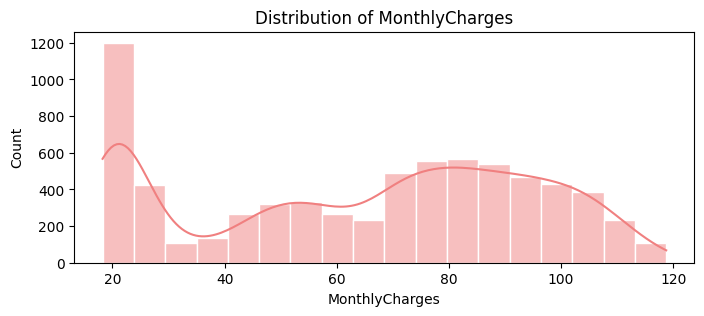

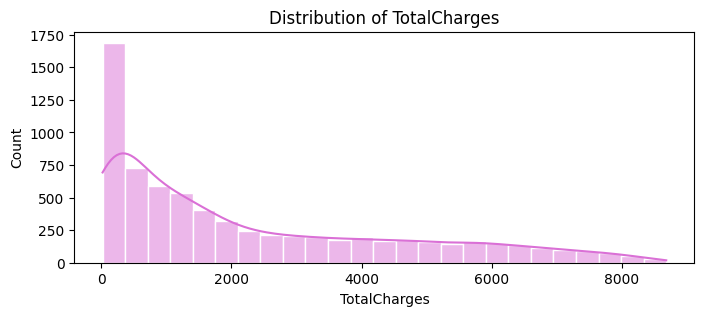

In [30]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
colors = ['pink', 'lightcoral', 'orchid']

for feat, color in zip(num_cols, colors):
    plt.figure(figsize=(8,3))
    plt.title(f"Distribution of {feat}")
    sns.histplot(df[feat], kde=True, color=color, edgecolor='white')
    plt.show()

# Simple alternative Plotly visualization with different style
import plotly.express as px
for feat in num_cols:
    fig = px.histogram(df, x=feat, nbins=30, color_discrete_sequence=['orchid'],
                       title=f"Distribution of {feat}", marginal="box")
    fig.update_layout(template='plotly_white')
    fig.show()

# **Lets Scale them**

## **Why StandardScaler?**
### We chose StandardScaler to standardize our continuous features to mean=0 and standard deviation=1. This approach preserves the underlying distributions while ensuring comparable scales across features. Unlike MinMaxScaler, which compresses data into [0, 1] and can distort relationships, StandardScaler maintains negative values and is well-suited for models that assume centered, standardized inputs.

In [31]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## **Visualizing scaled distributions after StandardScaler**

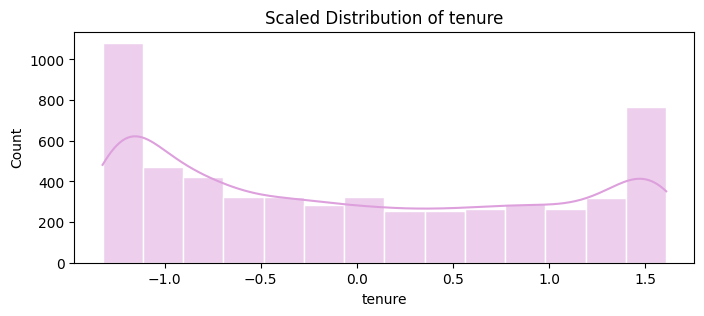

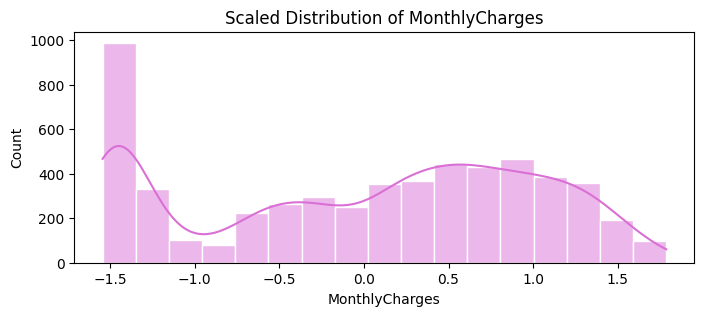

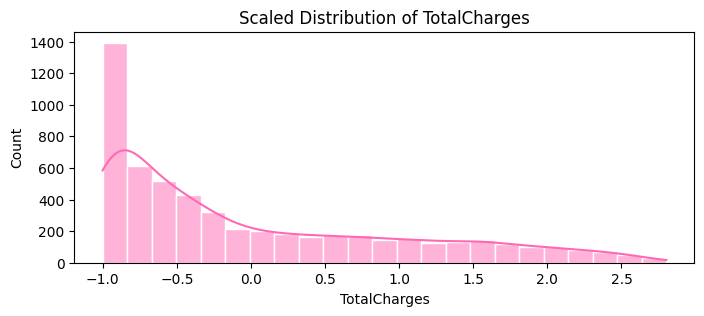

In [32]:
scaled_colors = ['plum', 'orchid', 'hotpink']

for feat, color in zip(num_cols, scaled_colors):
    plt.figure(figsize=(8,3))
    plt.title(f"Scaled Distribution of {feat}")
    sns.histplot(X_train[feat], kde=True, color=color, edgecolor='white')
    plt.show()

# Simple alternative Plotly visualization for scaled features
import plotly.express as px
for feat in num_cols:
    fig = px.histogram(X_train, x=feat, nbins=30, color_discrete_sequence=['hotpink'],
                       title=f"Scaled Distribution of {feat}", marginal="box")
    fig.update_layout(template='plotly_white')
    fig.show()

# **Check Class Imbalance (Before SMOTE)**

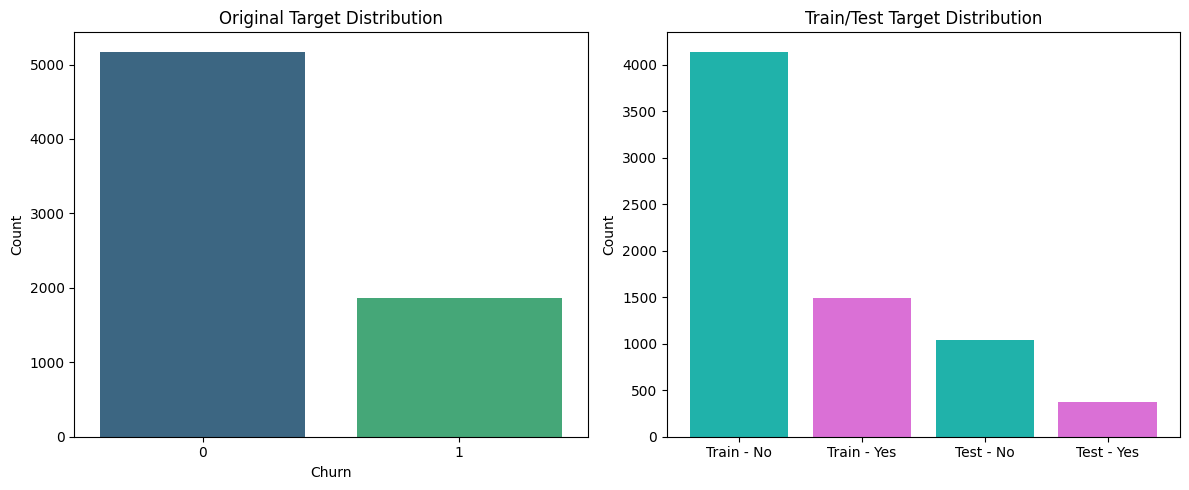

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y, ax=axes[0], palette='viridis')
axes[0].set_title('Original Target Distribution')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()

axes[1].bar(['Train - No', 'Train - Yes', 'Test - No', 'Test - Yes'],
             [train_dist[0], train_dist[1], test_dist[0], test_dist[1]],
             color=['lightseagreen', 'orchid', 'lightseagreen', 'orchid'])
axes[1].set_title('Train/Test Target Distribution')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

# **Baseline Models BEFORE Handling Imbalance**

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



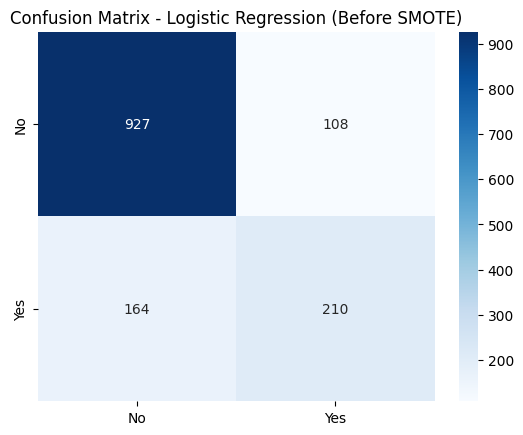

In [34]:
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

print(classification_report(y_test, y_pred_baseline))

cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression (Before SMOTE)')
plt.show()

# **Handling Imbalance with SMOTE**

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [37]:
print(pd.Series(y_train_bal).value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64


In [38]:
# Make DataFrame
resampled_df = pd.DataFrame({'Churn': y_train_bal})

# Plot
fig = px.histogram(resampled_df, x='Churn', color='Churn',
                    title='Distribution of Churn in Resampled (Balanced) Training Set',
                    text_auto=True,
                    color_discrete_sequence=['lightseagreen', 'orchid'])

fig.update_layout(bargap=0.2)
fig.show()

Handling Class Imbalance:
The target variable (Churn) is imbalanced with significantly more non-churners than churners. We applied SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class in the training set. This helps the model learn to identify churners more effectively, leading to improved recall and balanced performance metrics.

# **C) Modeling After Balancing - Multiple Classifiers**

## Define Base Models with Explanations

In [44]:
models = {

    # Logistic Regression:
    # Simple, interpretable, linear baseline. Good for benchmarking and understanding feature impacts.
    'Logistic Regression': make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    ),

    # Random Forest:
    # Ensemble of decision trees. Captures nonlinear relationships and handles interactions well.
    # Good for tabular churn data with mixed types.
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        class_weight='balanced',
        random_state=42
    ),

    # XGBoost:
    # Very powerful gradient boosting model. Excels at structured data.
    # Can handle class imbalance, complex patterns.
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),

    # AdaBoost:
    # Focuses on hard-to-classify samples by boosting weak learners.
    # Simple but effective in many churn problems.
    'AdaBoost': AdaBoostClassifier(
        n_estimators=200,
        learning_rate=0.5,
        random_state=42
    ),

    # LightGBM:
    # Advanced gradient boosting. Often faster and even better than XGBoost on tabular data.
    # Handles categorical features well and scales efficiently.
    'LightGBM': LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        class_weight='balanced',
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

## Define a more powerful meta-classifier: Stacking

## Why Stacking?
### Combines predictions from multiple models optimally.Learns how to weight and use each base learner, unlike simple voting which just averages.Helps exploit complementary strengths of diverse models.

In [45]:
stacking_estimators = list(models.items())

# Use Logistic Regression as meta-learner (final estimator).
stacking_classifier = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    passthrough=True,  # Include original features with base predictions
    cv=5,
    n_jobs=-1
)

# Add StackingClassifier to the models dictionary
models['Stacking Classifier'] = stacking_classifier

# Train and Evaluate All Models


Training: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.49      0.69      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



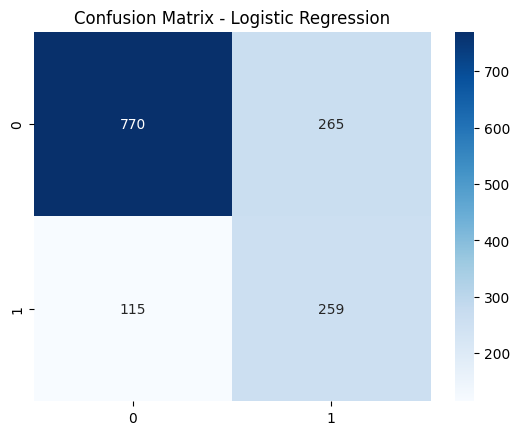


Training: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



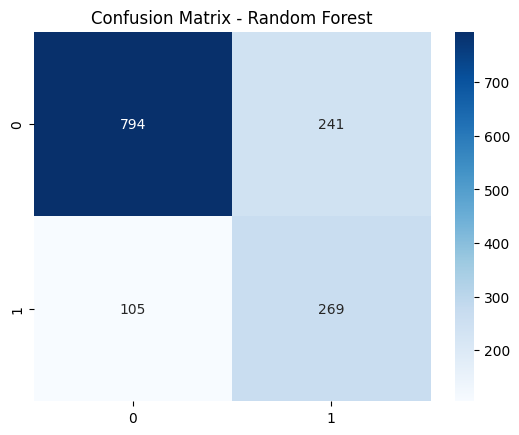


Training: XGBoost
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.71      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



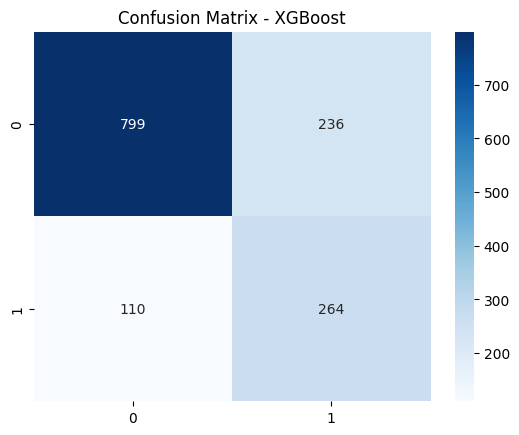


Training: AdaBoost
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



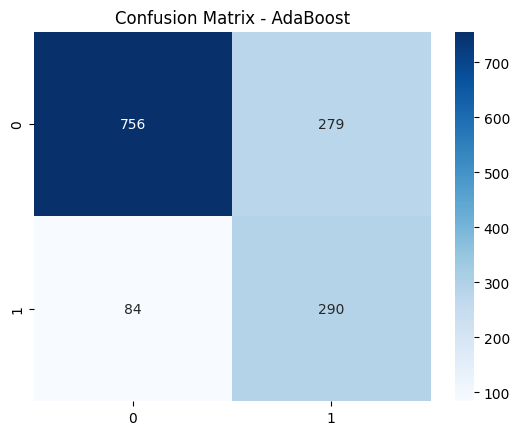


Training: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

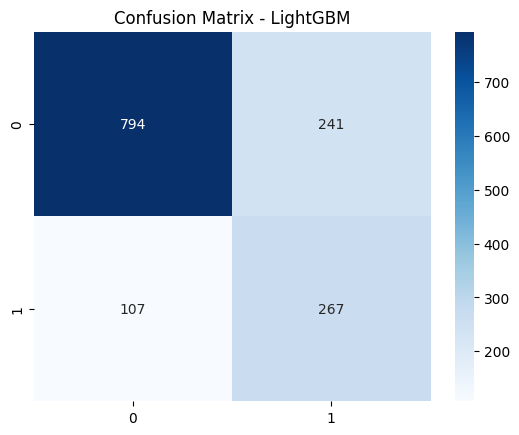


Training: Stacking Classifier
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.54      0.66      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



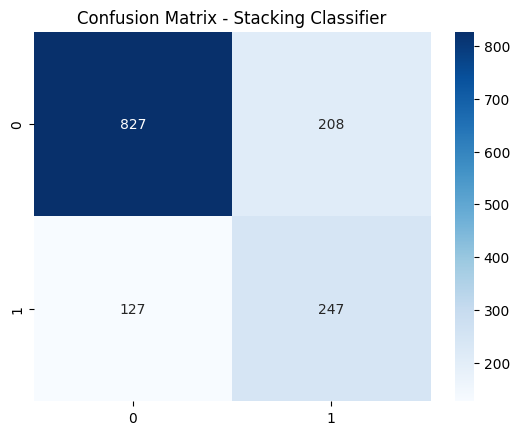

In [46]:
results = []

for name, model in models.items():
    print(f"\nTraining: {name}")

    # Fit on training data
    model.fit(X_train_bal, y_train_bal)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'ROC AUC': auc
    })

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [47]:
results_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
3,AdaBoost,0.742370,0.509666,0.775401,0.615058,0.839497
1,Random Forest,0.754436,0.527451,0.719251,0.608597,0.834004
4,LightGBM,0.753016,0.525591,0.713904,0.605442,0.831697
2,XGBoost,0.754436,0.528000,0.705882,0.604119,0.831671
5,Stacking Classifier,0.762243,0.542857,0.660428,0.595899,0.818469
0,Logistic Regression,0.730305,0.494275,0.692513,0.576837,0.818701


# **Grid Search for better results:**

## **1) Define the hyperparameter grid for Random Forest**

### We want to try different combinations of these parameters to find the best settings.

In [67]:
param_grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest.
                                        # More trees generally improve performance but increase training time.

    'max_depth': [5, 10, 15],           # Maximum depth of each tree.
                                        # Limiting depth helps prevent overfitting by restricting how "deep" splits can go.

    'min_samples_split': [2, 5],        # Minimum number of samples required to split an internal node.
                                        # Higher values reduce overfitting by forcing the tree to consider bigger splits.

    'min_samples_leaf': [1, 2]          # Minimum number of samples required at a leaf node.
                                        # Larger values smooth the model, helping generalization.
}

## **2) Define the RandomForestClassifier with class_weight**

In [71]:
rf = RandomForestClassifier(
    class_weight='balanced', #It adjusts weights inversely proportional
    random_state=42
)

## **3) Set up GridSearchCV**

### GridSearchCV will try all parameter combinations in param_grid, It evaluates them using cross-validation (cv=5 here) and picks the best, scoring='f1' focuses on F1-score, suitable for imbalanced churn problems.

In [77]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [78]:
grid_search.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

# **Print the best hyperparameters found**

In [79]:
print("\nBest hyperparameters found:")
print(grid_search.best_params_)
print("\nBest cross-validated F1-score:")
print(grid_search.best_score_)


✅ Best hyperparameters found:
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

✅ Best cross-validated F1-score:
0.8495625056347208


## **Show all grid search results nicely**

### We convert the full cross-validation results to a DataFrame, and sort by mean_test_score to see which parameter combinations worked best, We only display the key columns for clarity.


In [80]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)
cv_results[
    ['param_n_estimators', 'param_max_depth',
     'param_min_samples_split', 'param_min_samples_leaf',
     'mean_test_score', 'std_test_score']
]

,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,std_test_score
25,200,15,2,1,0.849563,0.024329
26,300,15,2,1,0.849550,0.024168
24,100,15,2,1,0.848640,0.025411
28,200,15,5,1,0.843614,0.024403
29,300,15,5,1,0.843434,0.025527
27,100,15,5,1,0.840449,0.024629
32,300,15,2,2,0.838380,0.023384
35,300,15,5,2,0.837642,0.023526
31,200,15,2,2,0.837239,0.023343
34,200,15,5,2,0.836838,0.022891


# **Grid search scoring with Accuracy scoring**

In [81]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [82]:
grid_search.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [83]:
print(" Best hyperparameters found:")
print(grid_search.best_params_)

print("\n Best cross-validated Accuracy")
print(grid_search.best_score_)

 Best hyperparameters found:
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

 Best cross-validated Accuracy
0.843683538391932


In [84]:
best_rf = grid_search.best_estimator_
print(best_rf)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=300,
                       random_state=42)


# **Evaluate on Test Set**

In [85]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

# **Classification Report:**

In [86]:
from sklearn.metrics import classification_report

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.53      0.68      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



In [87]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_acc)

Test Set Accuracy: 0.7579843860894251


# **Confusion Matrix**

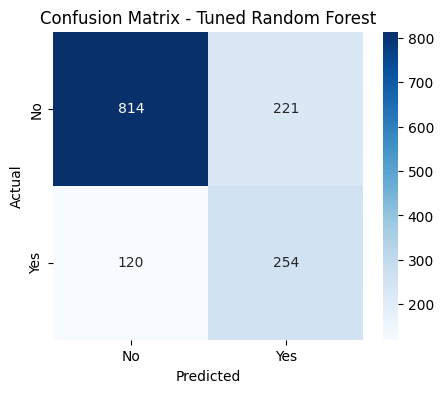

In [88]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **ROC/AUC curve plot**

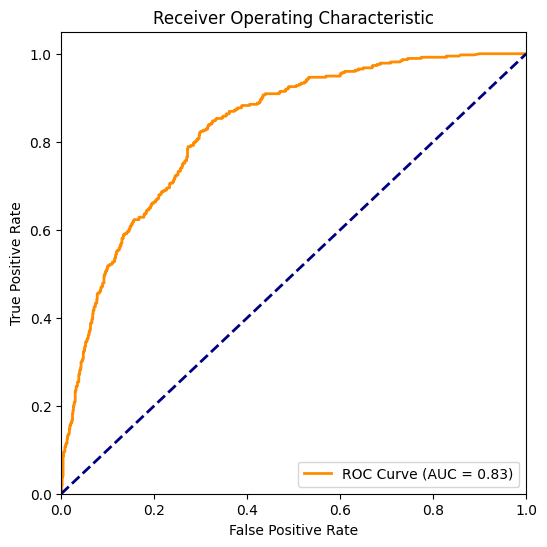

In [89]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### The ROC curve above shows that our churn prediction model performs well at distinguishing between customers who will churn and those who will not. The Area Under the Curve (AUC) is 0.83, indicating strong discriminative power. AUC of 0.83 means the model correctly ranks a randomly chosen churner higher than a non-churner 83% of the time.

# **View All Cross-Validation Results**

In [90]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)
cv_results[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
26,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.843684,0.019599
25,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.843683,0.019936
24,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.842717,0.021199
28,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.838489,0.019447
29,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.838368,0.020810
27,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.835348,0.019702
32,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.832691,0.018254
35,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.831845,0.018302
31,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.831362,0.018299
30,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.831362,0.018324


# **Plot mean test score over parameter combinations:**

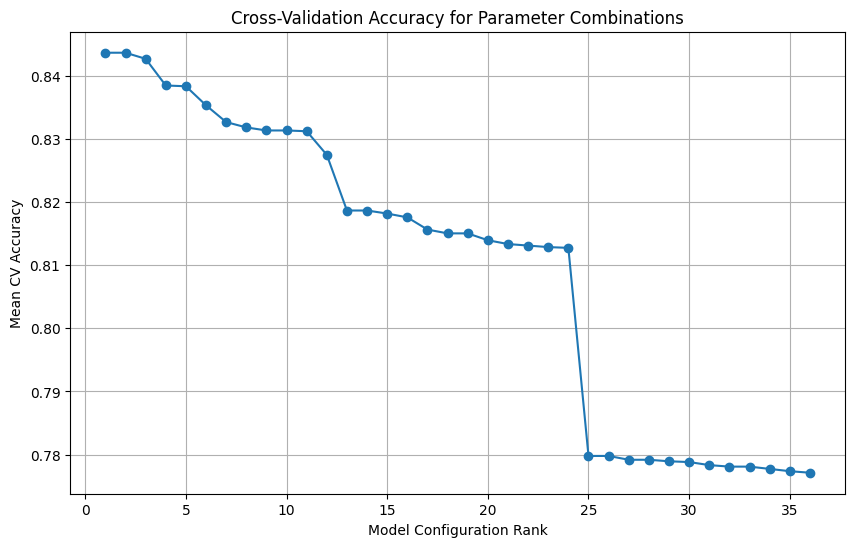

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cv_results)+1), cv_results['mean_test_score'], marker='o')
plt.title('Cross-Validation Accuracy for Parameter Combinations')
plt.xlabel('Model Configuration Rank')
plt.ylabel('Mean CV Accuracy')
plt.grid()
plt.show()

# **Conclusion**
### The plot above shows the mean cross-validation accuracy for different hyperparameter combinations tested during grid search. The best configurations achieve a mean CV accuracy above 84%, indicating strong model performance with good generalization on unseen data. As the rank increases, we see a clear decline in accuracy, demonstrating that certain parameter choices lead to worse performance and potential overfitting or underfitting. This highlights the importance of systematic hyperparameter tuning to identify configurations that balance model complexity and predictive accuracy. Selecting top-ranked configurations will help ensure robust and reliable churn prediction in deployment.

# **Random Forest feature importances:**

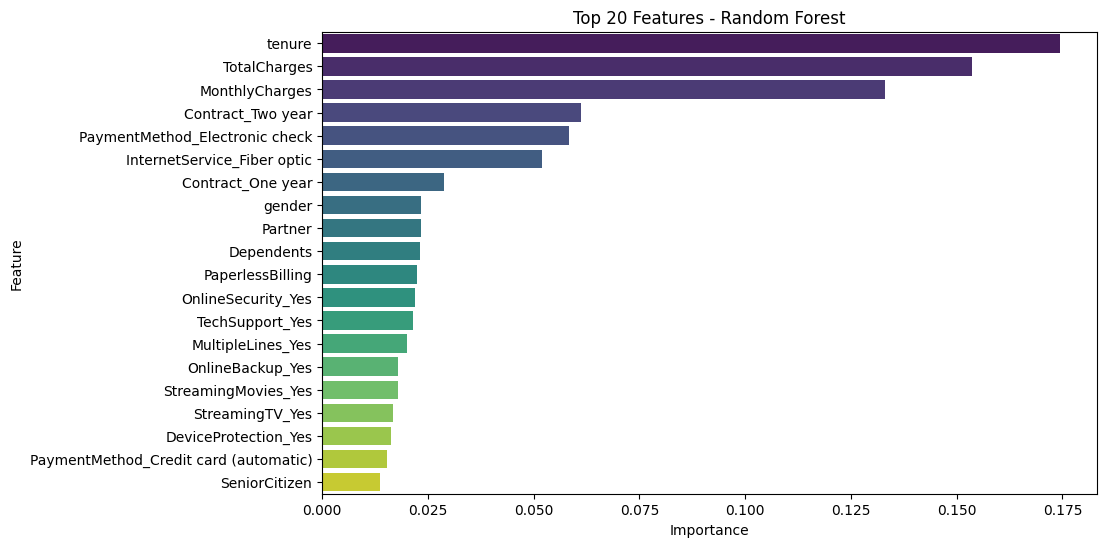

In [96]:
importances = best_rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(20), palette='viridis')
plt.title('Top 20 Features - Random Forest')
plt.show()

# **Save Best Model for Deployment**

In [93]:
joblib.dump(best_rf, 'best_rf_GridSearch_model.pkl')
print("Best model saved as 'best_rf_GridSearch_model.pkl'")

Best model saved as 'best_rf_GridSearch_model.pkl'


In [94]:
from google.colab import files
files.download('best_rf_GridSearch_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Predict Example for Deployment / Testing**

In [95]:
example = X_test.iloc[0].values.reshape(1, -1)
predicted_class = best_rf.predict(example)[0]
predicted_proba = best_rf.predict_proba(example)[0][1]

print("Predicted Churn Class (0=No, 1=Yes):", predicted_class)
print("Predicted Churn Probability:", predicted_proba)

Predicted Churn Class (0=No, 1=Yes): 0
Predicted Churn Probability: 0.002235024567295931


# **Vissualization for testing**

In [100]:
import random
import plotly.graph_objects as go

# Pick a random index
random_idx = random.randint(0, X_test.shape[0]-1)
example = X_test.iloc[random_idx].values.reshape(1, -1)

# Predict
predicted_class = best_rf.predict(example)[0]
predicted_proba = best_rf.predict_proba(example)[0][1]

# Print details
print(f" Random Customer Index: {random_idx}")
print("Predicted Churn Class (0=No, 1=Yes):", predicted_class)
print("Predicted Churn Probability:", round(predicted_proba, 3))

# Minimum display height for better visualization
display_prob = max(predicted_proba, 0.05)

# Color mapping
bar_color = 'red' if predicted_class == 1 else 'lightblue'
class_text = 'CHURN' if predicted_class == 1 else 'NO CHURN'

# Plotly bar
fig = go.Figure(go.Bar(
    x=[class_text],
    y=[display_prob],
    marker_color=bar_color,
    text=[f"Predicted Probability: {predicted_proba:.2f}"],
    textposition='auto'
))

fig.update_layout(
    title='Predicted Churn Probability for Random Customer',
    yaxis_title='Churn Probability',
    xaxis_title='Predicted Class',
    yaxis=dict(range=[0, 1]),
    template='plotly_white',
    showlegend=False
)

fig.show()

 Random Customer Index: 520
Predicted Churn Class (0=No, 1=Yes): 0
Predicted Churn Probability: 0.245
